In [1]:
import anndata
import scanpy as sc
import scvelo as scv
import os
from spvelo import *

In [2]:
# read preprocessed multi-batch spatial transcriptomics dataset
adata = anndata.read_h5ad('/gpfs/gibbs/pi/zhao/wl545/spatial_velo_sorted/OSCC/concat_pp_wonc.h5ad')
# create directory
## store the result adata with velocity estimate in 'save_dir/adatas'
## store the vae models in 'save_dir/models' as pickle files
save_dir = "/gpfs/gibbs/pi/zhao/wl545/spatial_velo_sorted/tutorial/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
if not os.path.exists(save_dir+'/adatas'):
    os.makedirs(save_dir+'/adatas')
if not os.path.exists(save_dir+'/models'):
    os.makedirs(save_dir+'/models')

In [3]:
# run method
setup_seed(0)
save_name = ''
method_name = 'spVelo'
result_adata = run_spVelo(adata, save_name=save_name, save_dir=save_dir, method_name=method_name, 
                          add_mnn=True, filter_uninfo=0.2, penalty='mmd', niche_edge=False, subsample=1.0, 
                          epoch=1000, batch_size=adata.shape[0], batch_key='batch', spatial_key='spatial', 
                          ct_key='cluster_annotations')

[rank: 0] Global seed set to 0


computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
INFO     Generating sequential column names                                                                        
use_rep : X_pca
batch_pair_list : [['1', '2'], ['1', '3'], ['1', '4'], ['1', '5'], ['1', '6'], ['1', '7'], ['1', '8'], ['1', '9'], ['1', '10'], ['1', '11'], ['1', '12'], ['2', '3'], ['2', '4'], ['2', '5'], ['2', '6'], ['2', '7'], ['2', '8'], ['2', '9'], ['2', '10'], ['2', '11'], ['2', '12'], ['3', '4'], ['3', '5'], ['3', '6'], ['3', '7'], ['3', '8'], ['3', '9'], ['3', '10'], ['3', '11'], ['3', '12'], ['4', '5'], ['4', '6'], ['4', '7'], ['4', '8'], ['4', '9'], ['4', '10'], ['4', '11'], ['4', '12'], ['5', '6'], ['5', '7'], ['5', '8'], ['5', '9'], ['5', '10'], ['5', '11'], ['5', '12'], ['6', '7'], ['6', '8'], ['6', '9'], ['6', '10'], ['6', '11'], ['6', '12'], ['7', '8'], ['7', '9'], ['7', '10'], ['7', '11'], ['7', '12'], ['8', '9'], ['8', '10'], ['8

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA RTX A5000') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 518/1000:  52%|█████▏    | 518/1000 [22:18<20:45,  2.58s/it, v_num=1, train_loss_step=-197, train_loss_epoch=-197]  
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -189.661. Signaling Trainer to stop.


computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/32 cores)


  0%|          | 0/518 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


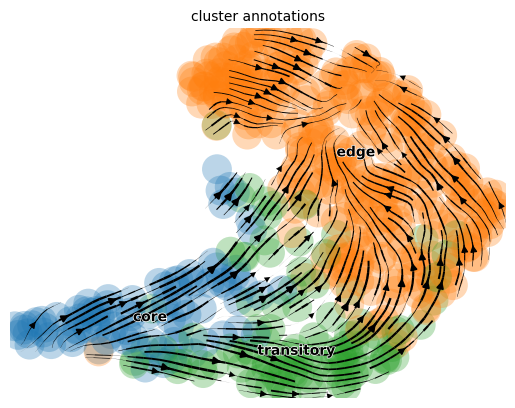

In [5]:
#visualize: use sample 4 as an example
sample = '4'
result_adata = anndata.read_h5ad(f"{save_dir}adatas/{save_name}_{method_name}.h5ad")
bdata = result_adata[result_adata.obs.batch==sample].copy()
scv.pp.neighbors(bdata, n_neighbors=30)
scv.tl.velocity_graph(bdata)
scv.pl.velocity_embedding_stream(bdata, basis='X_umap',color='cluster_annotations') 